# Lasso and Ridge Regression

**Lasso regression:** It is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean.

<hr>

**Ridge Regression:** It is a way to create a predictive and explonatory model when the number of predictor variables in a set exceeds the number of observations, or when a data set has multicollinearity (correlations between predictor variables).

<hr>

- With this brief knowledge of Lasso and Ridge, in this notebook we are going to predict the Height of the person given the age.

**Dataset can be directly downloaded from <a href="https://archive.org/download/ages-and-heights/AgesAndHeights.pkl">here</a>.**


## Importing Libraries


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

## Importing Dataset


In [2]:
!wget 'https://archive.org/download/ages-and-heights/AgesAndHeights.pkl'

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
raw_data = pd.read_pickle(
    'AgesAndHeights.pkl'
)  # Dataset Link: https://archive.org/download/ages-and-heights/AgesAndHeights.pkl
raw_data

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


In [4]:
raw_data.describe()

,Age,Height
count,100.000000,100.000000
mean,7.966138,45.955674
std,5.321621,10.787318
min,-0.780853,27.332513
25%,3.048885,36.320107
50%,7.795597,46.178251
75%,11.464331,53.994166
max,17.887852,68.170414


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     100 non-null    float64
 1   Height  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


## Data Visualisation


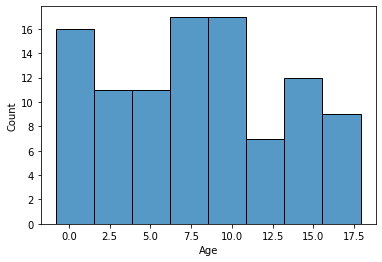

In [6]:
sns.histplot(raw_data['Age'])
plt.show()

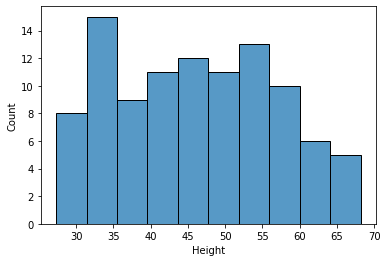

In [7]:
sns.histplot(raw_data['Height'], kde=False, bins=10)
plt.show()

## Data Preprocessing


In [8]:
cleaned = raw_data[raw_data['Age'] > 0]
cleaned.shape

# 7 Columns in the Dataset where the Age was less than 0, which is pretty unobvious.

(93, 2)

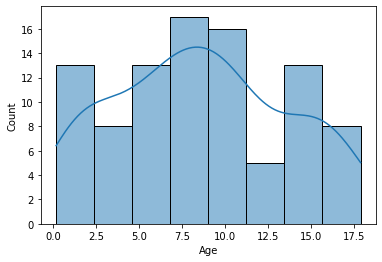

In [9]:
sns.histplot(cleaned['Age'], kde=True)
plt.show()

In [10]:
cleaned.describe()

,Age,Height
count,93.000000,93.000000
mean,8.595192,47.164420
std,4.975428,10.190036
min,0.195686,29.007696
25%,5.020210,38.287710
50%,8.433330,47.332750
75%,11.923862,54.751892
max,17.887852,68.170414


In [11]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     93 non-null     float64
 1   Height  93 non-null     float64
dtypes: float64(2)
memory usage: 2.2 KB


C:\Users\Sriniketh J\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


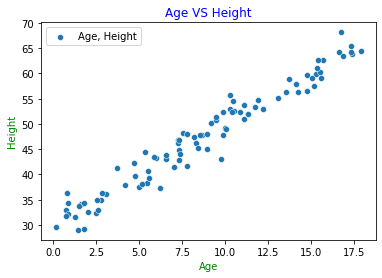

In [12]:
sns.scatterplot(cleaned['Age'],
                cleaned['Height'],
                label='Age, Height')
plt.title('Age VS Height', color='blue')
plt.xlabel('Age', color='green')
plt.ylabel('Height', color='green')
plt.legend()
plt.show()

**Scaling the Data in the range of (0, 1) to fit the model easily.**


In [13]:
scaler = MinMaxScaler()
cleaned_data = pd.DataFrame(scaler.fit_transform(cleaned))
cleaned_data.columns = ['Age', 'Height']
cleaned_data

,Age,Height
0,0.823652,0.781861
1,0.164592,0.182285
2,0.399681,0.457200
3,0.091537,0.003012
4,0.935899,1.000000
...,...,...
88,0.402892,0.455786
89,0.304984,0.263830
90,0.137344,0.099871
91,0.300902,0.298663


## Model Building


In [14]:
age = cleaned_data['Age']
height = cleaned_data['Height']

### Lasso


In [15]:
model_l = Lasso()
X = cleaned_data[['Age']]
y = cleaned_data[['Height']]

In [16]:
model_l.fit(X, y)

Lasso()

#### Lasso - Predict


In [17]:
np.float64(model_l.predict([[16]]) * 100)


46.36226692844643

### Ridge


In [18]:
model_r = Ridge()

In [19]:
model_r.fit(X, y)

Ridge()

#### Ridge - Predict


In [20]:
np.float64(model_r.predict([[16]]) * 10)


128.04771476386978

### With and Without Regularisation


Use `ML Algorithms` to build and train the model. Here, `Simple Linear Regression` is used. Before that let's create a necessary environment to build the model.

Actual -> $y = \alpha + \beta  x + \epsilon$

True -> $\hat{y} = \alpha + \beta  x$


In [21]:
# random parameter values

parameters = {'alpha': 40, 'beta': 4}


In [22]:
# y_hat using formulas mentioned above

def y_hat(age, params):
    alpha = params['alpha']
    beta = params['beta']
    return alpha + beta * age


age = int(input('Enter age: '))
y_hat(age, parameters)

60

In [23]:
# learning better parameters for optimum result (using Regularisation)

def learn_parameters(data, params):
    x, y = data['Age'], data['Height']
    x_bar, y_bar = x.mean(), y.mean()
    x, y = x.to_numpy(), y.to_numpy()
    beta = sum(((x - x_bar) * (y - y_bar)) / sum((x - x_bar)**2))
    alpha = y_bar - beta * x_bar
    params['alpha'] = alpha
    params['beta'] = beta

In [24]:
# new parameters derived from 'learn_parameters' function

new_parameter = {'alpha': -2, 'beta': 1000}
learn_parameters(cleaned, new_parameter)
new_parameter

{'alpha': 29.96185761461583, 'beta': 2.0014168989106316}

In [25]:
# general untrained predictions

spaced_ages = list(range(19))
spaced_untrained_predictions = [y_hat(x, parameters) for x in spaced_ages]
print(spaced_untrained_predictions)

[40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112]


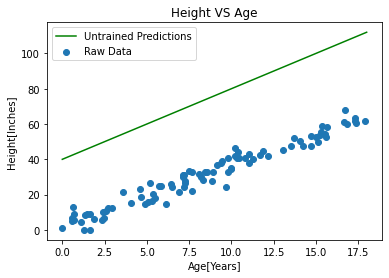

In [29]:
# Untrained Predictions

ages = cleaned_data[['Age']] * 17.887852
heights = cleaned_data[['Height']] * 68.170414
plt.scatter(ages, heights, label='Raw Data')
plt.plot(spaced_ages,
         spaced_untrained_predictions,
         label='Untrained Predictions',
         color='green')
plt.title('Height VS Age')
plt.xlabel('Age[Years]')
plt.ylabel('Height[Inches]')
plt.legend()
plt.show()

Trained Predicted Values:  [29.96185761461583, 31.96327451352646, 33.96469141243709, 35.966108311347725, 37.96752521025836, 39.96894210916899, 41.97035900807962, 43.97177590699025, 45.97319280590088, 47.97460970481151, 49.97602660372215, 51.97744350263278, 53.97886040154341, 55.98027730045404, 57.98169419936467, 59.9831110982753, 61.984527997185936, 63.98594489609657, 65.98736179500719]


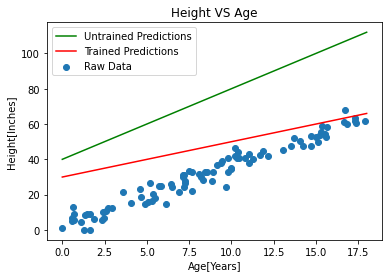

In [27]:
# Trained Predictions

spaced_trained_predictions = [y_hat(x, new_parameter) for x in spaced_ages]
print('Trained Predicted Values: ',spaced_trained_predictions)
plt.scatter(ages,heights, label='Raw Data')
plt.plot(spaced_ages, spaced_untrained_predictions, label = 'Untrained Predictions', color = 'green')
plt.plot(spaced_ages, spaced_trained_predictions, label = 'Trained Predictions', color = 'red')
plt.title('Height VS Age')
plt.xlabel('Age[Years]')
plt.ylabel('Height[Inches]')
plt.legend()
plt.show()

# We can see that the result is not optimal but has changed significantly from a normal Linear Regression Type Model

# Summary

_Input (Age):_ 16

| **Model Name** | **Results** |
| :------------: | :---------- |
|     Lasso      | 42.3622     |
|     Ridge      | 128.0477    |

- We can see from the above plot how a normal Linear Regression performs and how a Linear Regression with either L1 or L2 norm Regularisations improves the predictions.
- From the above table, we can conclude that Ridge model out performs Lasso by a huge margin and point to be **noted**, that it is the case with this dataset, which may prove wrong for a different Dataset.
- It also satisfies the definition of Lasso and Ridge Regression, mentioned at the start of the notebook.

**P.S.** It always cannot be the case that Regularisation Model outperforms Linear Regression in all cases. It happens in almost all cases but in some exceptional cases it is the vice versa.
